In [1]:
import sys
import os

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re


import tensorflow as tf
from tensorflow import keras
from keras import preprocessing

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
import pandas as pd
import numpy as np
import re

import nltk

from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dr3di\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dr3di\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dr3di\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df_yelp = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D213\d213_task2\sentiment_labelled_sentences\sentiment_labelled_sentences\yelp_labelled.txt', delimiter='\t', header=None)
df_yelp.columns = ['Review', 'Sentiment']
df_yelp.head()

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df_yelp.tail()

,Review,Sentiment
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
df_yelp.shape

(1000, 2)

In [6]:
df_yelp.isnull().any()

Review       False
Sentiment    False
dtype: bool

In [7]:
df_yelp.value_counts()

Review                                                                                                                          Sentiment
I won't be back.                                                                                                                0            2
The food was terrible.                                                                                                          0            2
I would not recommend this place.                                                                                               0            2
I love this place.                                                                                                              1            2
The folks at Otto always make us feel so welcome and special.                                                                   1            1
                                                                                                                                            ..
I wi

In [8]:
reviews_text = df_yelp['Review']
print(reviews_text)              

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object


In [9]:
#Remove special characters, and remove stop words

stop_words = stopwords.words('english')
for i in df_yelp['Review']:
    i = re.sub("[^a-zA-Z0-9]"," ", i)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
#Tokenize the text from review column and print the total vocabulary size
tokenizer = Tokenizer(num_words = 2072)
tokenizer.fit_on_texts(df_yelp['Review'])
vocab_size = len(tokenizer.word_index)
vocab_size = vocab_size + 1
print(vocab_size)

#Tokenizer has been set with all the words from df_yelp['Review'] with no stop words or special characters

2072


In [11]:
word_index = tokenizer.word_index

#Create a sequence of tokens from the word index to represent the semantic value of each review
sequences = tokenizer.texts_to_sequences(df_yelp['Review'])

In [12]:
print(sequences[40])
print(sequences[440])

[1, 267, 268, 2, 443]
[249, 226, 20, 400, 291, 1418, 357]


In [13]:
#Pre-pad missing values with 0 so all sequence lengths are the same. Now we have arrays of values and can perform vector mathematics
padded_seq = pad_sequences(sequences)

In [14]:
padded_seq.shape

(1000, 32)

In [15]:
X_train = padded_seq[0:800]
print(X_train)

[[  0   0   0 ... 165   8  15]
 [  0   0   0 ...   7  12  16]
 [  0   0   0 ...   4  46 430]
 ...
 [  0   0   0 ...  15   7  22]
 [  0   0   0 ...   0 280  11]
 [  0   0   0 ...  21   1  15]]


In [16]:
X_test = padded_seq[800:1000]
print(X_test)

[[   0    0    0 ...   82  261 1822]
 [   0    0    0 ...    4  261   54]
 [   0    0    0 ...  416   26  695]
 ...
 [   0    0    0 ...   12   38   31]
 [   0    0    0 ...  137  159   40]
 [   0    0    0 ...  347    1  248]]


In [17]:
print(df_yelp['Review'][0])
print(df_yelp['Review'][799])
print(df_yelp['Review'][800])
print(df_yelp['Review'][999])

Wow... Loved this place.
Once you get inside you'll be impressed with the place.
I'm super pissd.
Then, as if I hadn't wasted enough of my life there, they poured salt in the wound by drawing out the time it took to bring the check.


In [18]:
X_train.shape

(800, 32)

In [19]:
X_test.shape

(200, 32)

In [20]:
y_train = df_yelp['Sentiment']
y_train = y_train[0:800]
print(y_train)

0      1
1      0
2      0
3      1
4      1
      ..
795    1
796    1
797    1
798    0
799    1
Name: Sentiment, Length: 800, dtype: int64


In [21]:
y_test = df_yelp['Sentiment']
y_test = y_test[800:1000]
print(y_test)

800    0
801    1
802    0
803    1
804    1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Sentiment, Length: 200, dtype: int64


In [22]:
#Plug the X_train vector into the Sequential model for model training, with vocab_size as 1st arg, embedding size as 2nd arg, and input features as 3rd arg
model = Sequential()
model.add(Embedding(2072, 128, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))
#binarcy_crossentropy informs tensowflow we want a binary output
model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 128)           265216    
_________________________________________________________________
lstm (LSTM)                  (None, 60)                45360     
_________________________________________________________________
dense (Dense)                (None, 1)                 61        
Total params: 310,637
Trainable params: 310,637
Non-trainable params: 0
_________________________________________________________________


In [34]:
early_stopping_monitor = EarlyStopping(patience=2)
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/5
7/7 [==============================] - 0s 44ms/step - loss: 0.1011 - accuracy: 0.9875 - val_loss: 0.8841 - val_accuracy: 0.7250
Epoch 2/5
7/7 [==============================] - 0s 36ms/step - loss: 0.0814 - accuracy: 0.9837 - val_loss: 0.4982 - val_accuracy: 0.8200
Epoch 3/5
7/7 [==============================] - 0s 37ms/step - loss: 0.0640 - accuracy: 0.9887 - val_loss: 0.6007 - val_accuracy: 0.7450
Epoch 4/5
7/7 [==============================] - 0s 38ms/step - loss: 0.0464 - accuracy: 0.9925 - val_loss: 0.7726 - val_accuracy: 0.7350
Epoch 5/5
7/7 [==============================] - 0s 36ms/step - loss: 0.0354 - accuracy: 0.9925 - val_loss: 0.5774 - val_accuracy: 0.7900


In [35]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 6ms/step - loss: 0.5774 - accuracy: 0.7900


[0.577385663986206, 0.7900000214576721]

In [36]:
model.save('Trained_yelp_model.keras')

In [37]:
import matplotlib.pyplot as plt

In [38]:
def plot_learningCurve(history, epochs):
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

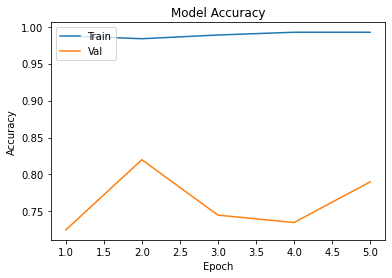

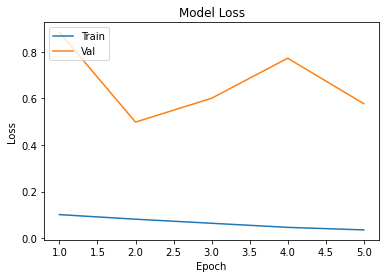

In [39]:
plot_learningCurve(history, 5)